In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import ensemble

In [2]:
df = pd.read_csv("creditcard.csv")


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
sum(df['Class'] == 1)

492

In [5]:
sum(df['Class'] == 0)

284315

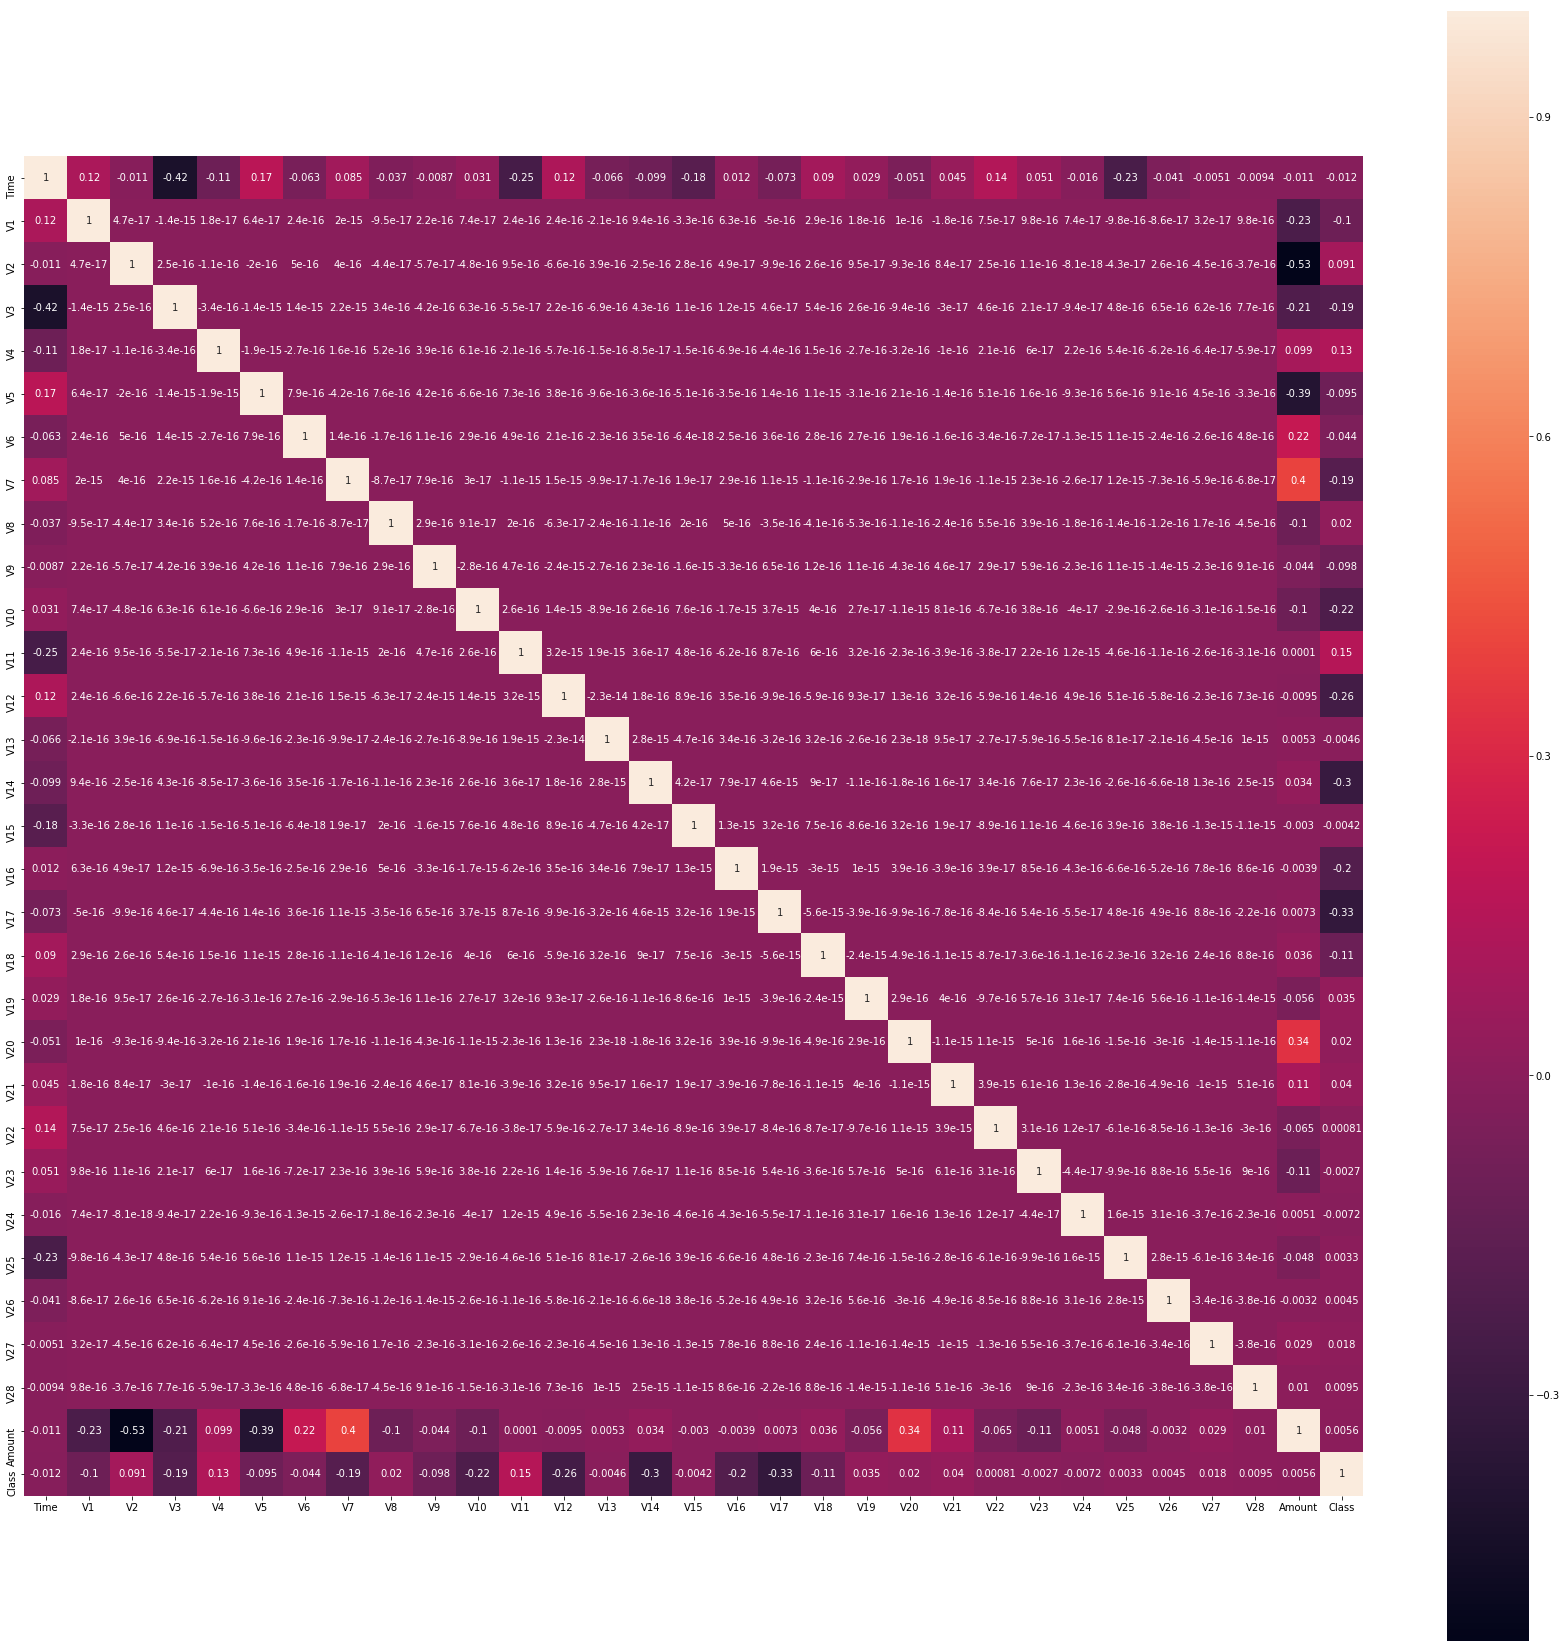

In [7]:
#we definitely have a biased dataset, let's look at correlation
corr = df.corr()
fig, ax = plt.subplots(figsize=(30,30)) 
sns.set_palette("muted")
sns.heatmap(corr, annot=True, square=True, ax=ax)

In [3]:
df2 = df.drop("Class", 1)

In [4]:
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
Y = df["Class"]
pca = PCA(n_components=8)
pca_fit = pca.fit_transform(df2)
ss = StandardScaler()
scaled = ss.fit_transform(df2, Y)

lr = LogisticRegression()
X = scaled


# Fit the model.



X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2)
fit = lr.fit(X_train, Y_train)
# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X_test)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y_test))

print('\n Percentage accuracy')
print(lr.score(X_test, Y_test))

print('\n Accuracy by admission status')
print(pd.crosstab(lr.predict(X), Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))





c:\users\sakok\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coefficients
[[-0.1282807   0.19563262 -0.0271296  -0.0112362   0.83399035  0.15346089
  -0.15073823 -0.13520059 -0.20979786 -0.44668071 -0.80764308 -0.03200135
   0.01257174 -0.30209011 -0.54830264 -0.1245759  -0.12543493 -0.00957021
  -0.04289784  0.12505532 -0.3449933   0.27785599  0.405971   -0.07444125
   0.01612287 -0.03780859  0.01480979 -0.32682627 -0.09115287  0.22007159]]
[-8.49380137]

 Accuracy by admission status
Class      0   1
row_0           
0      56843  43
1         13  63

 Percentage accuracy
0.999016888452

 Accuracy by admission status
Class       0    1
row_0             
0      284272  182
1          43  310

 Percentage accuracy
0.999209991327


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
df3 = pd.DataFrame()
df3["V1"] = df2["V1"]
df3["V2"] = df2["V4"]
df3["V3"] = df2["V5"]
df3["V4"] = df2["V12"]
df3["V5"] = df2["V21"]
df3["V6"] = df2["Amount"]
Y = df["Class"]
pca = PCA(n_components=4)
pca_fit = pca.fit_transform(df3)
ss = StandardScaler()
scaled = ss.fit_transform(df2, Y)

lr = LogisticRegression()
X = scaled


# Fit the model.



X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2)
fit = lr.fit(X_train, Y_train)
# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X_test)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y_test))

print('\n Percentage accuracy')
print(lr.score(X_test, Y_test))

print('\n Accuracy by admission status')
print(pd.crosstab(lr.predict(X), Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))





c:\users\sakok\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coefficients
[[-0.13922465  0.15968676  0.0594787   0.05442065  0.93490987  0.1763328
  -0.15561962 -0.13485679 -0.22648884 -0.25131427 -0.75951702  0.07043462
  -0.00668539 -0.28956481 -0.50560169 -0.10628279 -0.20017265 -0.0467013
  -0.00641336  0.02690367 -0.28438502  0.21868247  0.3395821  -0.02942694
   0.05295028 -0.05718754 -0.04242356 -0.235554   -0.0585594   0.2576855 ]]
[-8.43682475]

 Accuracy by admission status
Class      0   1
row_0           
0      56847  32
1         17  66

 Percentage accuracy
0.999139777395

 Accuracy by admission status
Class       0    1
row_0             
0      284269  172
1          46  320

 Percentage accuracy
0.999234569375


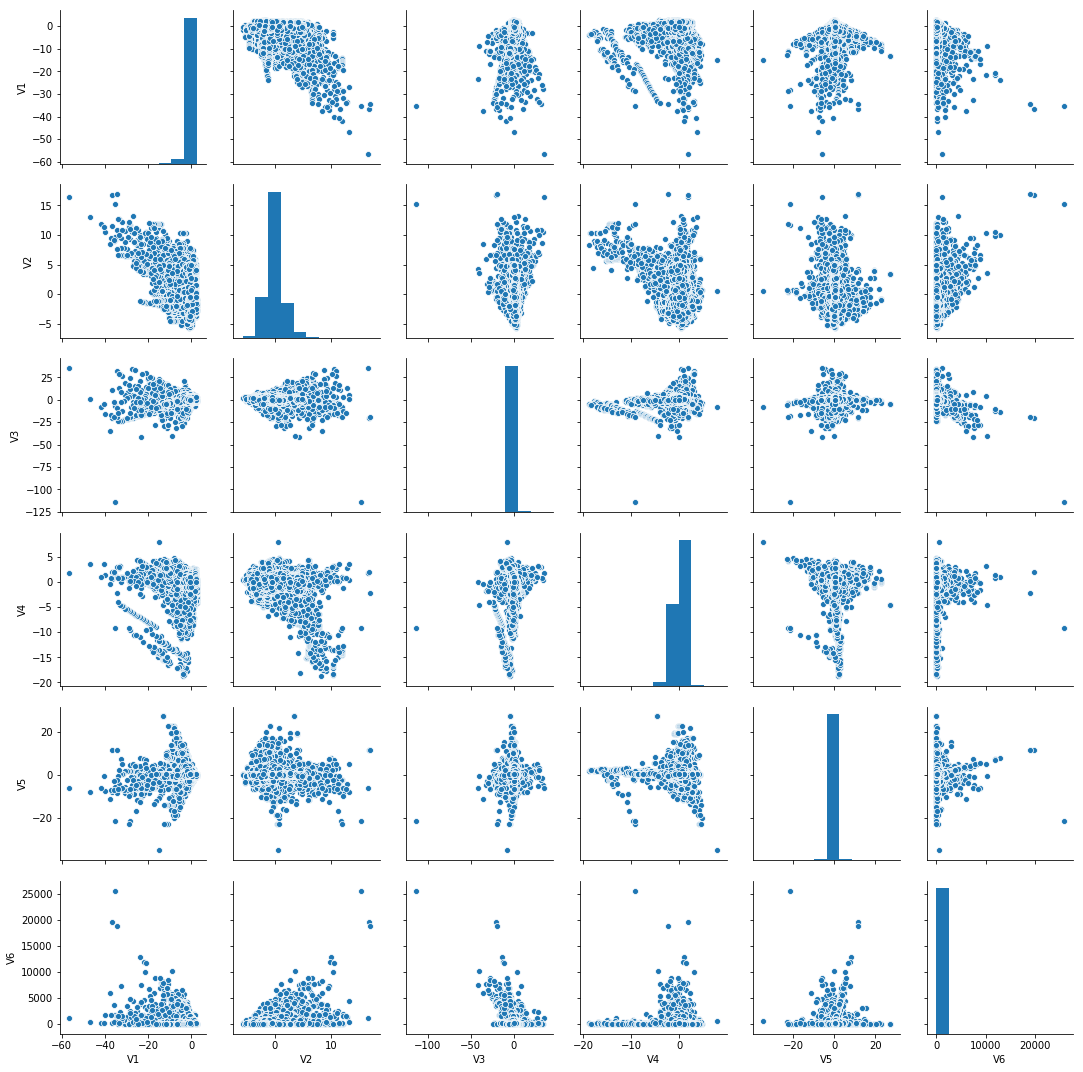

In [37]:
sns.pairplot(df3)

In [16]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr, X, Y, cv=10)

c:\users\sakok\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sakok\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sakok\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sakok\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sakok\appdata\local\programs\python\pyt

array([ 0.98416544,  0.99919247,  0.999684  ,  0.99940311,  0.99887644,
        0.99912219,  0.99964888,  0.99877107,  0.99891152,  0.99873596])

In [ ]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.

params = {'n_estimators': 60,
          'max_depth': 4,
          'subsample': 0.7
          }

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
% time clf.fit(X_train, Y_train)

#predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print('\n Accuracy by admission status')
print(pd.crosstab(predict_test, Y_test))

print('\n Accuracy by admission status')
#print(clf.score(predict_test, Y_test))

In [ ]:
from sklearn.svm import SVR
svc = SVR()
fit_svc = svc.fit(X_train, Y_train)

predict_test = fit_svc.predict(X_test)

print('\n Accuracy by admission status')
print(pd.crosstab(predict_test, Y_test))

c:\users\sakok\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
- close to 0 coeff. try and remove - also + 1
